# Load

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('C:/Users/j_hor/Documents/Coderhouse/Data Science/Data/Raw')
nba_df = pd.read_csv('Seasons_Stats_NBA.csv', sep= ',')
print(nba_df.shape)
nba_df.head(3)

(24691, 53)


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0


In [3]:
# For glossary visit https://www.basketball-reference.com/about/glossary.html
nba_df.drop(['blanl','blank2'], axis='columns', inplace=True)
nba_df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

# FG%

In [4]:
# Filtering Dataframe by players who take at least 1 FGA
nba_df = nba_df[nba_df['FGA'] > 0.0]
print(nba_df.shape)
nba_df.head()

(24525, 51)


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [5]:
# Converting to datetimeindex 'Year' values, and assigning them to season
season = pd.to_datetime(nba_df.Year, format='%Y')
season = pd.DatetimeIndex(season)
season

DatetimeIndex(['1950-01-01', '1950-01-01', '1950-01-01', '1950-01-01',
               '1950-01-01', '1950-01-01', '1950-01-01', '1950-01-01',
               '1950-01-01', '1950-01-01',
               ...
               '2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Year', length=24525, freq=None)

In [6]:
# Add column to DataFrame
nba_df['Season'] = season.strftime('%Y')
nba_df.head(2)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,1950
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,1950


In [7]:
# FG% descriptive stats. Low deviation and values concentrated in a very small range 
nba_df.describe()['FG%']

count    24525.000000
mean         0.430817
std          0.095921
min          0.000000
25%          0.393000
50%          0.439000
75%          0.480000
max          1.000000
Name: FG%, dtype: float64

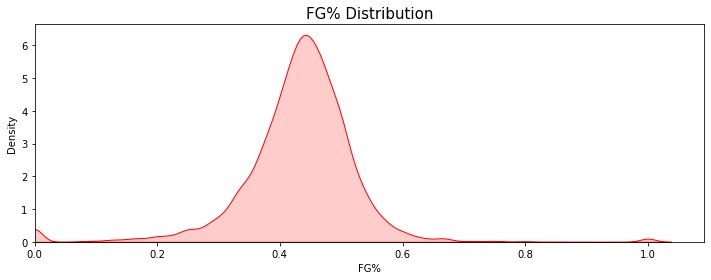

In [8]:
# FG% distribution. It seems very symmetrical
fig, ax = plt.subplots(figsize=(12,4))
ax = sns.kdeplot(nba_df['FG%'], shade=True, color='red', alpha=0.2)
ax.set_title('FG% Distribution')
ax.title.set_size(15)
plt.xlim(0,);

In [9]:
# 2P% descriptive stats since 1979-1980 NBA Season (at least one 2PA) 
two_points_percentage = nba_df[(nba_df['Year'] >= 1980.0) & (nba_df['2PA'] > 0)]
two_points_percentage.describe()['2P%']

count    18810.000000
mean         0.457184
std          0.100017
min          0.000000
25%          0.423000
50%          0.467000
75%          0.503000
max          1.000000
Name: 2P%, dtype: float64

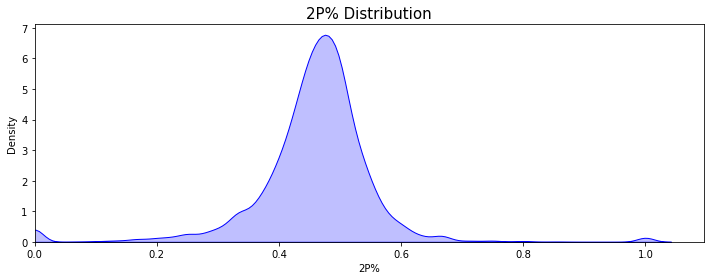

In [10]:
# 2P% distribution. It almost duplicates FG% distribution
fig, ax = plt.subplots(figsize=(12,4))
ax = sns.kdeplot(two_points_percentage['2P%'], shade=True, color='blue')
ax.set_title('2P% Distribution')
ax.title.set_size(15)
plt.xlim(0,);

In [11]:
# 3P% descriptive stats since 1979-1980 NBA Season. At least one 3PA
three_points_percentage = nba_df[(nba_df['Year'] >= 1980.0) & (nba_df['3PA'] > 0)]
three_points_percentage.describe()['3P%']

count    15416.000000
mean         0.248796
std          0.176683
min          0.000000
25%          0.100000
50%          0.292000
75%          0.363000
max          1.000000
Name: 3P%, dtype: float64

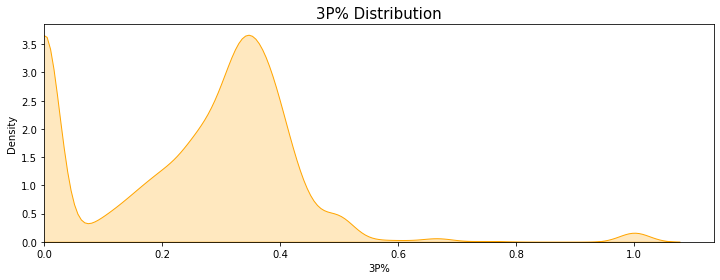

In [12]:
# 3P% distribution. Values under 0.10 should be normalize to dismiss players with insignificant amount of 3PA.
fig, ax = plt.subplots(figsize=(12,4))
ax = sns.kdeplot(nba_df['3P%'], shade=True, color='orange')
ax.set_title('3P% Distribution')
ax.title.set_size(15)
plt.xlim(0,);

In [13]:
# FG% mean by season
field_goals_percentage = nba_df.groupby(['Year']).mean()['FG%']
field_goals_percentage.head()

Year
1950.0    0.318109
1951.0    0.332741
1952.0    0.344500
1953.0    0.336775
1954.0    0.343492
Name: FG%, dtype: float64

In [14]:
# 2P% mean by season. Series start in 1979-1980 NBA Season; until this time, FG and 2P shots were the same. Because of that, a '2PA' > 0 filter was added.
two_points_percentage = nba_df[(nba_df['Year'] >= 1980.0) & (nba_df['2PA'] > 0)].groupby(['Year']).mean()['2P%']
two_points_percentage.head()

Year
1980.0    0.462730
1981.0    0.457551
1982.0    0.475893
1983.0    0.466417
1984.0    0.476789
Name: 2P%, dtype: float64

In [15]:
# 3P% mean by season. Series starts in 1979-1980 NBA Season, when three point line was introduced to the game. Because of that, a 3PA > 0 filter was added. 
three_points_percentage = nba_df[(nba_df['Year'] >= 1980.0) & (nba_df['3PA'] > 0)].groupby(['Year']).mean()['3P%']
three_points_percentage.head()

Year
1980.0    0.198000
1981.0    0.153069
1982.0    0.171106
1983.0    0.138080
1984.0    0.176390
Name: 3P%, dtype: float64

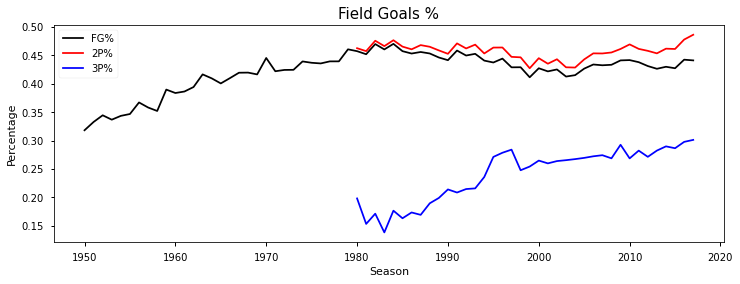

In [16]:
# FG%, 2P% and 3P% time series
# FG% has move along same range percentage since 1990s
# However, 2P% and 3P% series have an ascendent slope. Particularly the 3P%.

mpl.style.use('seaborn-notebook')
fig, ax = plt.subplots(figsize=(12,4))
plt.plot(field_goals_percentage,data=nba_df,color='k')
plt.plot(two_points_percentage,data=nba_df,color='r')
plt.plot(three_points_percentage,data=nba_df,color='b')
plt.legend(loc='upper left')
ax.set_xlabel('Season')
ax.set_ylabel('Percentage')
ax.set_title('Field Goals %')
ax.title.set_size(15);

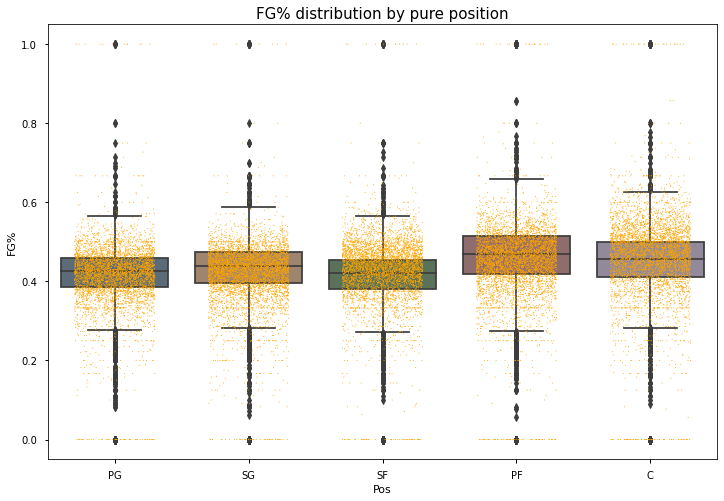

In [17]:
# FG% by pure positions. By 'pure' I mean only 1 position on the floor, according to dataset
# Outliers at 0.0 or 1.0 should be dismissed, presumably considering players with a inisgnificant amount of FGA.

pure_positions = nba_df[(nba_df.Pos.isin(['PG','SG','SF','PF','C']))]
fg_per_pure_positions = pure_positions['FG%']
ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x=pure_positions.Pos, y=fg_per_pure_positions, saturation=0.2)
ax = sns.stripplot(x=pure_positions.Pos, y=fg_per_pure_positions, color="orange", jitter=0.3, size=1.0, order=['PG', 'SG','SF','PF','C'])
ax.set_title('FG% distribution by pure position')
ax.title.set_size(15);

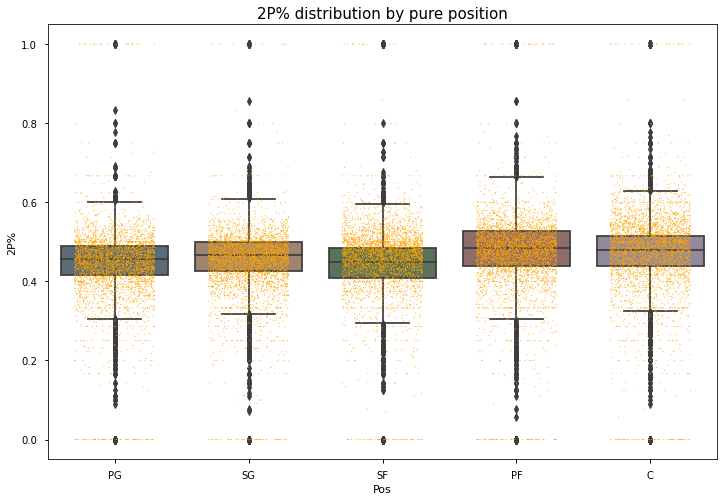

In [18]:
# 2P% by 'pure' positions
twopoints_per_pure_positions = pure_positions[(pure_positions['2PA'] > 0) & (pure_positions['Year'] >= 1980.0)]['2P%']
ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x=pure_positions.Pos, y=twopoints_per_pure_positions, saturation=0.2)
ax = sns.stripplot(x=pure_positions.Pos, y=twopoints_per_pure_positions, color="orange", jitter=0.3, size=1.0, order=['PG', 'SG','SF','PF','C'])
ax.set_title('2P% distribution by pure position')
ax.title.set_size(15);

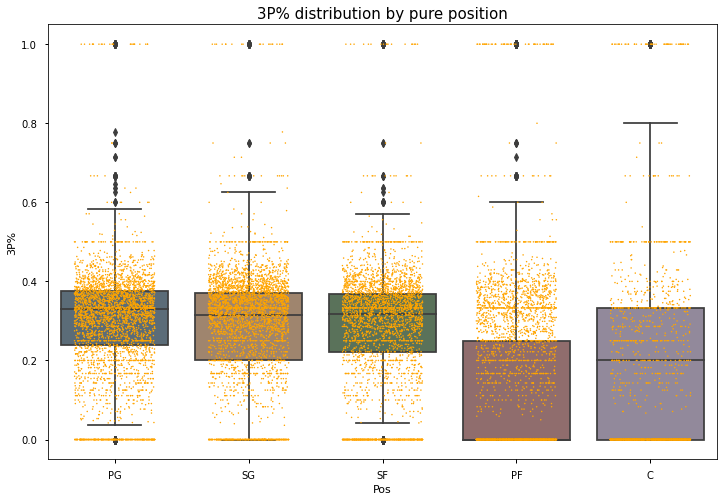

In [19]:
# 3P% by 'pure' positions
threepoints_per_pure_positions = pure_positions[(pure_positions['3PA'] > 0) & (pure_positions['Year'] >= 1980.0)]['3P%']
ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x=pure_positions.Pos, y=threepoints_per_pure_positions, saturation=0.2)
ax = sns.stripplot(x=pure_positions.Pos, y=threepoints_per_pure_positions, color="orange", jitter=0.3, size=1.5, order=['PG', 'SG','SF','PF','C'])
ax.set_title('3P% distribution by pure position')
ax.title.set_size(15);

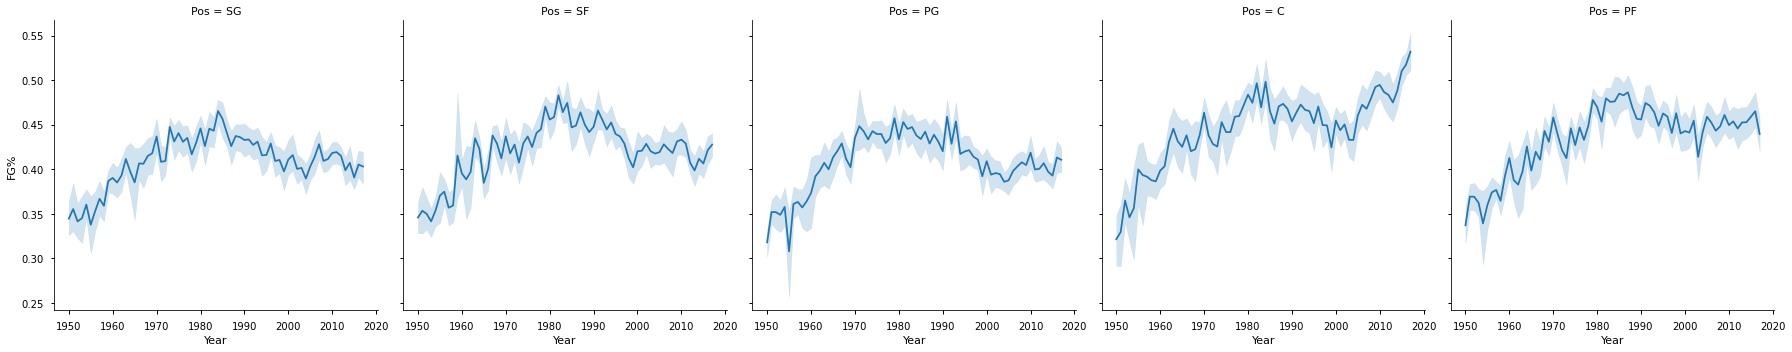

In [20]:
# Time series for FG%, by 'pure' positions

ax = sns.relplot(x=pure_positions.Year, y=pure_positions['FG%'], col=pure_positions.Pos, kind='line', col_wrap=5);

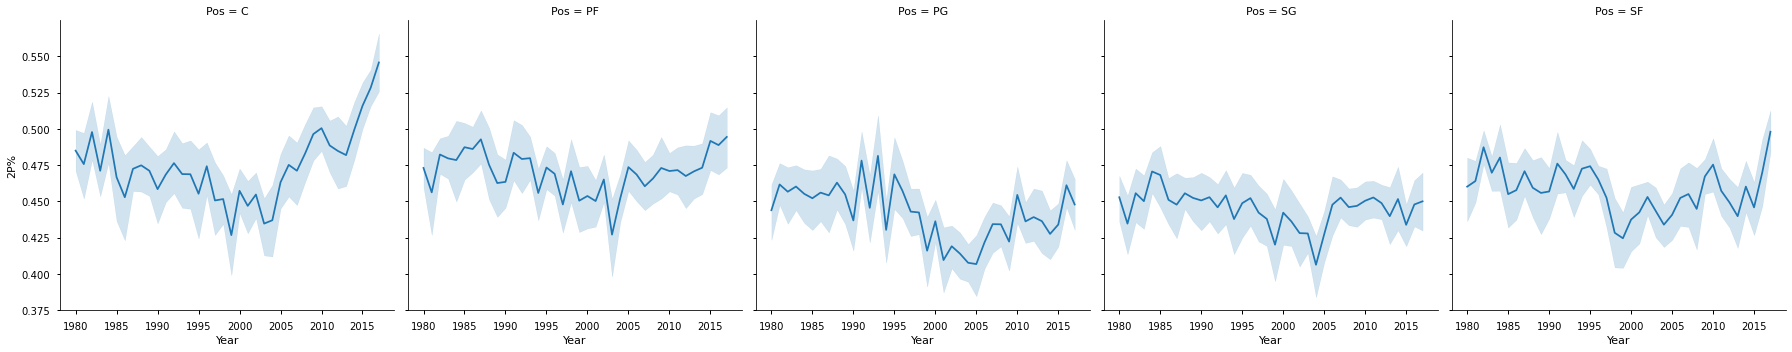

In [21]:
# Time series for 2P%, by 'pure' positions
pure_positions = pure_positions[(pure_positions['Year'] >= 1980.0) & (pure_positions['2PA'] > 0.0)]
sns.relplot(x=pure_positions.Year, y=pure_positions['2P%'], col=pure_positions.Pos, kind='line', col_wrap=5);

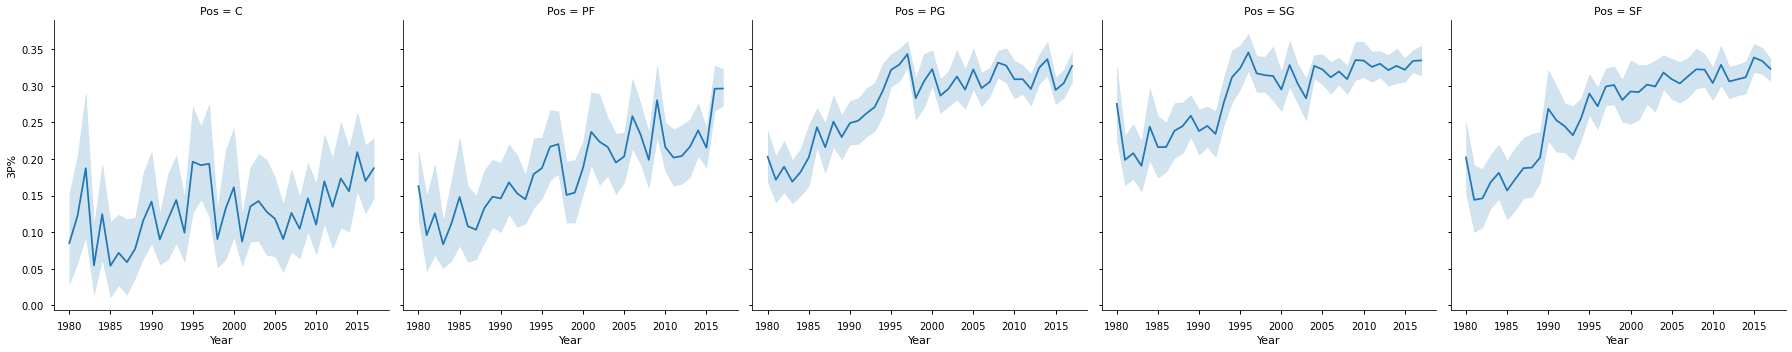

In [22]:
# Time series for 3P%, by 'pure' positions
pure_positions = pure_positions[(pure_positions['Year'] >= 1980.0) & (pure_positions['3PA'] > 0.0)]
sns.relplot(x=pure_positions.Year, y=pure_positions['3P%'], col=pure_positions.Pos, kind='line', col_wrap=5);

# FGa

In [23]:
# FGA by season
field_goals_a = nba_df.groupby(['Year']).sum()['FGA']
field_goals_a.head()

Year
1950.0    108515.0
1951.0     65262.0
1952.0     56232.0
1953.0     60467.0
1954.0     52444.0
Name: FGA, dtype: float64

In [24]:
# 2PA by season. Since 1979-1980 NBA Season, players with at least one 2P shot attempted
two_points_a = nba_df[(nba_df['Year'] >= 1980.0) & (nba_df['2PA'] > 0.0)].groupby(["Year"]).sum()['2PA']
two_points_a.head()

Year
1980.0    176190.0
1981.0    172754.0
1982.0    175326.0
1983.0    179734.0
1984.0    165331.0
Name: 2PA, dtype: float64

In [25]:
# 3PA by season. Since 1979-1980 NBA Season, players with at least one 3P shot attempted
three_points_a = nba_df[(nba_df['Year'] >= 1980.0) & (nba_df['3PA'] > 0.0)].groupby(["Year"]).sum()['3PA']
three_points_a.head()

Year
1980.0    5522.0
1981.0    4161.0
1982.0    4655.0
1983.0    4592.0
1984.0    4599.0
Name: 3PA, dtype: float64

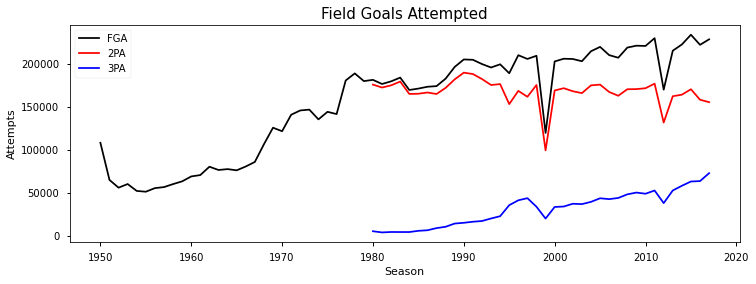

In [26]:
# Although 1999-00 and 2011-12 lock-out seasons dramatically interrupted the course, each series has a trend:
# 2PA is slowly falling down
# On the other side, 3PA is always rising, as well as FGA

mpl.style.use('seaborn-notebook')
fig, ax = plt.subplots(figsize=(12,4))
plt.plot(field_goals_a,data=nba_df,color='k')
plt.plot(two_points_a,data=nba_df,color='r')
plt.plot(three_points_a,data=nba_df,color='b')
plt.legend(loc='upper left')
ax.set_xlabel('Season')
ax.set_ylabel('Attempts')
ax.set_title('Field Goals Attempted')
ax.title.set_size(15);

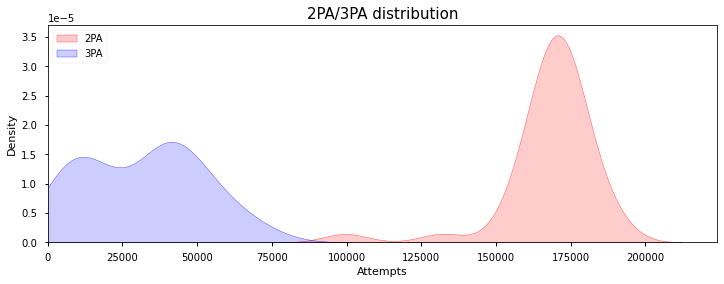

In [27]:
# 2PA/3PA distribution. While 2PA has a clear simmetrycal form, 3PA has a range between 0 and 75000 attempts. 
# This could be related to the way the game is played last years (and compared to 1980-1990s game style)
fig, ax = plt.subplots(figsize=(12,4))
ax = sns.kdeplot(two_points_a, shade=True, color='red', alpha=0.2, label='2PA')
ax = sns.kdeplot(three_points_a, shade=True, color='blue', alpha=0.2, label='3PA')
ax.set_title('2PA/3PA distribution')
ax.title.set_size(15)
ax.set_xlabel('Attempts')
ax.legend(loc='upper left')
plt.xlim(0,);

In [28]:
# 2PA descriptive stats
two_points_a.describe()

count        38.000000
mean     168126.210526
std       15271.279513
min       99639.000000
25%      165268.000000
50%      170788.500000
75%      175712.000000
max      190093.000000
Name: 2PA, dtype: float64

In [29]:
# 3PA descriptive stats
three_points_a.describe()

count       38.000000
mean     31680.052632
std      19734.481682
min       4161.000000
25%      14712.250000
50%      35082.000000
75%      44204.500000
max      73136.000000
Name: 3PA, dtype: float64

# Correlations

In [30]:
# Checking 2PA/3PA - PTS Pearson correlations. Including NBA Seasons since 1979-80 season. 
nba_correlation = nba_df[(nba_df['Year'] >= 1980.0)]
nba_correlation.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
5727,5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,...,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,1980
5728,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,...,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0,1980
5729,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,...,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0,1980
5730,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0,1980
5731,5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,...,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0,1980


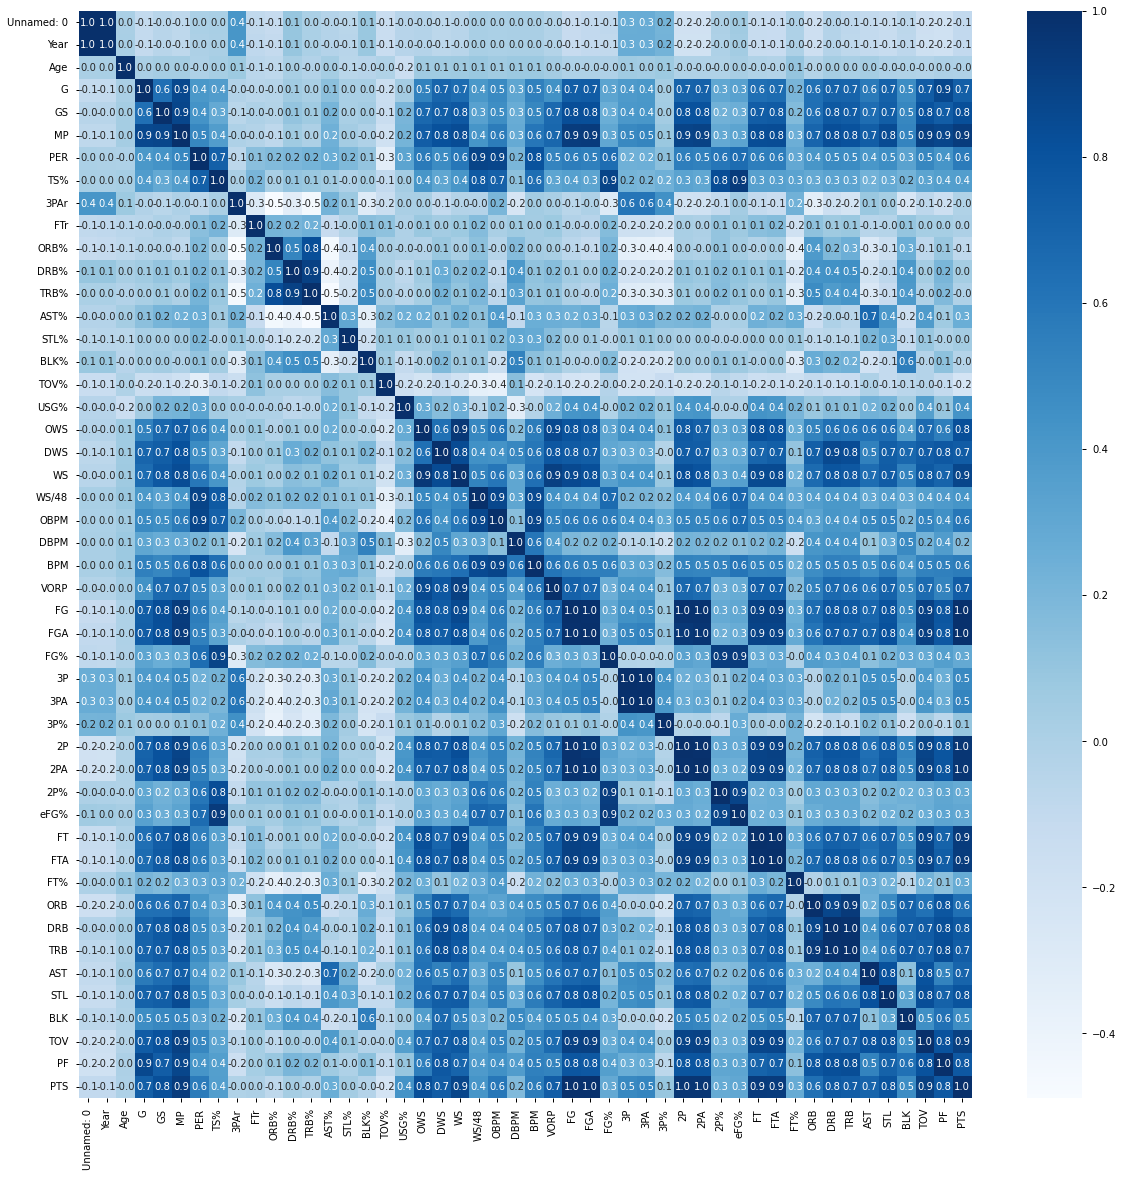

In [31]:
# Matrix correlation, looking for correlations between variables
nba_correlation = nba_correlation.corr()

ax = plt.figure(figsize=(20,20))
sns.heatmap(nba_correlation, cbar=True, fmt='.1f', annot=True, cmap='Blues');

In [32]:
# In case you forget them ;)
nba_df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'Season'],
      dtype='object')

In [33]:
# Defining total_points variable for 2P-PTS Pearson correlation
total_points = nba_df[(nba_df['Year'] >= 1980.0)].groupby(['Season']).sum()['PTS']
total_points.head()

Season
1980    218635.0
1981    215251.0
1982    220769.0
1983    222338.0
1984    211533.0
Name: PTS, dtype: float64

In [34]:
# Testing correlation between 2PA and PTS
np.corrcoef(two_points_a,total_points)

array([[1.        , 0.53405031],
       [0.53405031, 1.        ]])

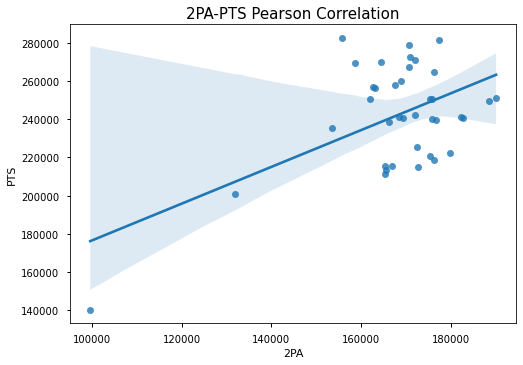

In [35]:
# Plotting 2PA-PTS correlation. Not much related
ax = sns.regplot(x= two_points_a, y= total_points)
ax.set_title('2PA-PTS Pearson Correlation')
ax.title.set_size(15);
#plt.savefig('2PA_PTS_correlation.png');

In [36]:
# Testing correlation between 2P% and PTS
np.corrcoef(two_points_percentage,total_points)

array([[1.        , 0.20807239],
       [0.20807239, 1.        ]])

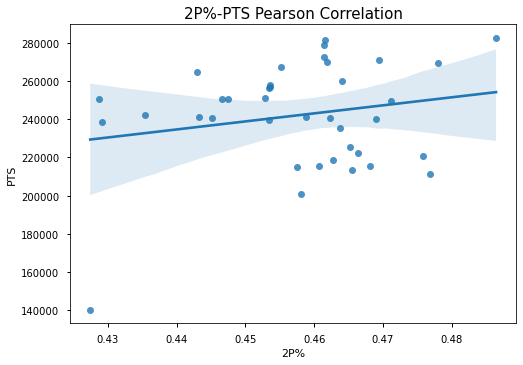

In [37]:
# Plotting 2P%-PTS correlation. They definitely are not related
ax = sns.regplot(x= two_points_percentage, y= total_points)
ax.set_title('2P%-PTS Pearson Correlation')
ax.title.set_size(15);

In [38]:
# Testing correlation between 3PA and PTS. It seems pretty significant
np.corrcoef(three_points_a,total_points)

array([[1.        , 0.71813211],
       [0.71813211, 1.        ]])

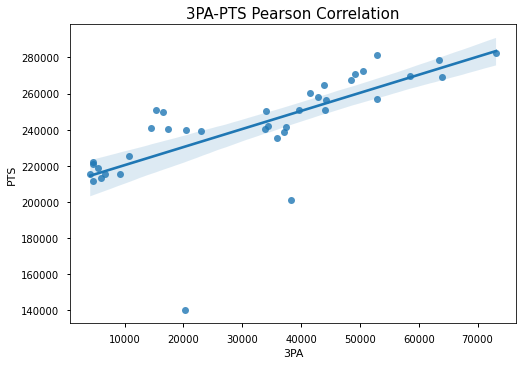

In [39]:
# Plotting 3PA-PTS correlation. Indeed, they are closed, but they have some outliers too.
ax = sns.regplot(x= three_points_a, y= total_points)
ax.set_title('3PA-PTS Pearson Correlation')
ax.title.set_size(15)
plt.savefig('3PA_PTS_correlation.png');

In [40]:
# Testing correlation between 3P% and PTS.
np.corrcoef(three_points_percentage,total_points)

array([[1.        , 0.57565873],
       [0.57565873, 1.        ]])

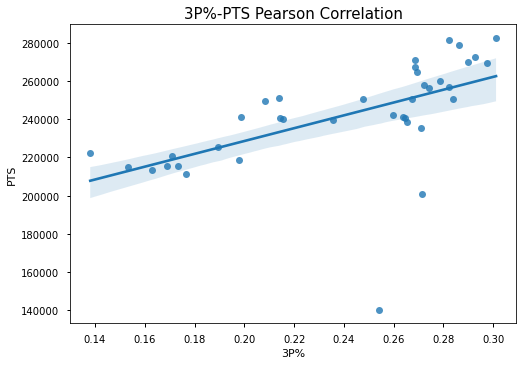

In [41]:
# Plotting 3P%-PTS correlation. Not so solid to pick it up.
ax = sns.regplot(x= three_points_percentage, y= total_points)
ax.set_title('3P%-PTS Pearson Correlation')
ax.title.set_size(15);

2P%/3P%-PTS Pearson Correlations by pure position. None of them have a relevant statistical percentage.

In [42]:
# Testing 2P%/3P% - PTS Pearson correlation for Point Guards
pg = nba_df[(nba_df.Pos.isin(['PG']))]
pg_2p_per = pg[(pg['Year'] >= 1980.0) & (pg['2PA'] > 0.0)].groupby(['Year']).mean()['2P%']
pg_3p_per = pg[(pg['Year'] >= 1980.0) & (pg['3PA'] > 0.0)].groupby(['Year']).mean()['3P%']

print(np.corrcoef(pg_2p_per,total_points))
print(np.corrcoef(pg_3p_per,total_points))

[[ 1.        -0.1063093]
 [-0.1063093  1.       ]]
[[1.        0.4969663]
 [0.4969663 1.       ]]


In [43]:
# Testing 2P%/3P% - PTS Pearson correlation for Shooting Guards
sg = nba_df[(nba_df.Pos.isin(['SG']))]
sg_2p_per = sg[(sg['Year'] >= 1980.0) & (sg['2PA'] > 0.0)].groupby(['Year']).mean()['2P%']
sg_3p_per = sg[(sg['Year'] >= 1980.0) & (sg['3PA'] > 0.0)].groupby(['Year']).mean()['3P%']

print(np.corrcoef(sg_2p_per,total_points))
print(np.corrcoef(sg_3p_per,total_points))

[[1.         0.03284437]
 [0.03284437 1.        ]]
[[1.         0.48271411]
 [0.48271411 1.        ]]


In [44]:
# Testing 2P%/3P% - PTS Pearson correlation for Small Forwards
sf = nba_df[(nba_df.Pos.isin(['SF']))]
sf_2p_per = sf[(sf['Year'] >= 1980.0) & (sf['2PA'] > 0.0)].groupby(['Year']).mean()['2P%']
sf_3p_per = sf[(sf['Year'] >= 1980.0) & (sf['3PA'] > 0.0)].groupby(['Year']).mean()['3P%']

print(np.corrcoef(sf_2p_per,total_points))
print(np.corrcoef(sf_3p_per,total_points))

[[1.         0.16023592]
 [0.16023592 1.        ]]
[[1.         0.58851653]
 [0.58851653 1.        ]]


In [45]:
# Testing 2P%/3P% - PTS Pearson correlation for Power Forwards
pf = nba_df[(nba_df.Pos.isin(['PF']))]
pf_2p_per = pf[(pf['Year'] >= 1980.0) & (pf['2PA'] > 0.0)].groupby(['Year']).mean()['2P%']
pf_3p_per = pf[(pf['Year'] >= 1980.0) & (pf['3PA'] > 0.0)].groupby(['Year']).mean()['3P%']

print(np.corrcoef(pf_2p_per,total_points))
print(np.corrcoef(pf_3p_per,total_points))

[[1.         0.15700335]
 [0.15700335 1.        ]]
[[1.         0.63176296]
 [0.63176296 1.        ]]


In [46]:
# Testing 2P%/3P% - PTS Pearson correlation for Centers
c = nba_df[(nba_df.Pos.isin(['C']))]
c_2p_per = c[(c['Year'] >= 1980.0) & (c['2PA'] > 0.0)].groupby(['Year']).mean()['2P%']
c_3p_per = c[(c['Year'] >= 1980.0) & (c['3PA'] > 0.0)].groupby(['Year']).mean()['3P%']

print(np.corrcoef(c_2p_per,total_points))
print(np.corrcoef(c_3p_per,total_points))

[[1.         0.47034102]
 [0.47034102 1.        ]]
[[1.         0.37170475]
 [0.37170475 1.        ]]
